# Data Analysis on Brain Stroke Dataset

## 1. Data Description and Cleaning

### Overview of the Dataset

The dataset includes information related to individual health and lifestyle factors potentially associated with the risk of having a stroke. It contains columns such as gender, age, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, smoking status, and a stroke indicator.


In [1]:
import pandas as pd

In [2]:
stroke_data = pd.read_csv('brain_stroke.csv')

stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Checking for Missing Values and Data Inconsistencies

We checked for missing values and inconsistencies in the dataset. The dataset was found to have no missing values.

In [3]:
data_description = {
    "Number of Rows": stroke_data.shape[0],
    "Number of Columns": stroke_data.shape[1],
    "Data Types": stroke_data.dtypes,
    "Missing Values": stroke_data.isnull().sum()
}

data_description

{'Number of Rows': 4981,
 'Number of Columns': 11,
 'Data Types': gender                object
 age                  float64
 hypertension           int64
 heart_disease          int64
 ever_married          object
 work_type             object
 Residence_type        object
 avg_glucose_level    float64
 bmi                  float64
 smoking_status        object
 stroke                 int64
 dtype: object,
 'Missing Values': gender               0
 age                  0
 hypertension         0
 heart_disease        0
 ever_married         0
 work_type            0
 Residence_type       0
 avg_glucose_level    0
 bmi                  0
 smoking_status       0
 stroke               0
 dtype: int64}

## 2. Exploratory Data Analysis (EDA)

### Distribution Analysis

We analyzed the distributions of 'age', 'avg_glucose_level', and 'BMI' and identified potential outliers.

In [4]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


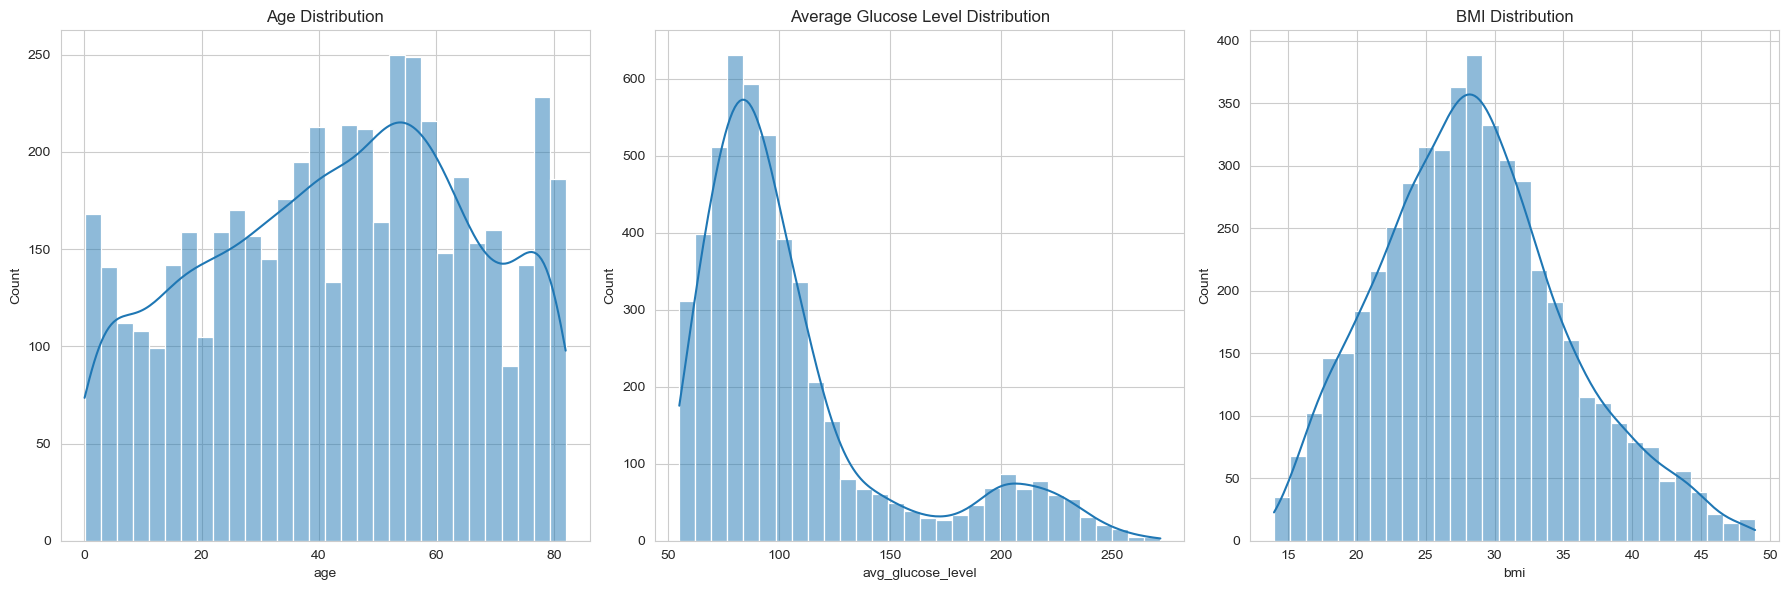

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(stroke_data['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(stroke_data['avg_glucose_level'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Average Glucose Level Distribution')

sns.histplot(stroke_data['bmi'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('BMI Distribution')

plt.tight_layout()
plt.show()

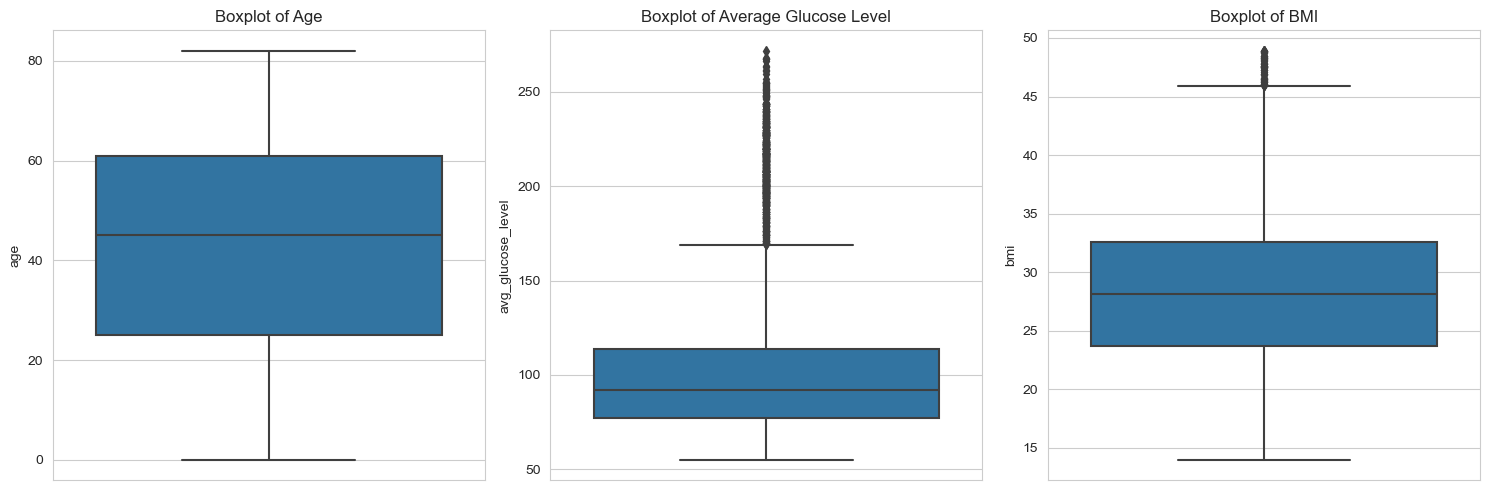

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=stroke_data['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=stroke_data['avg_glucose_level'])
plt.title('Boxplot of Average Glucose Level')


plt.subplot(1, 3, 3)
sns.boxplot(y=stroke_data['bmi'])
plt.title('Boxplot of BMI')

plt.tight_layout()
plt.show()

### Outlier Identification and Winsorization

Outliers in 'avg_glucose_level' and 'BMI' were capped at their 95th percentile values.

In [7]:
stroke_data['avg_glucose_level_capped'] = stroke_data['avg_glucose_level'].apply(lambda x: min(x, stroke_data['avg_glucose_level'].quantile(0.95)))
stroke_data['bmi_capped'] = stroke_data['bmi'].apply(lambda x: min(x, stroke_data['bmi'].quantile(0.95)))

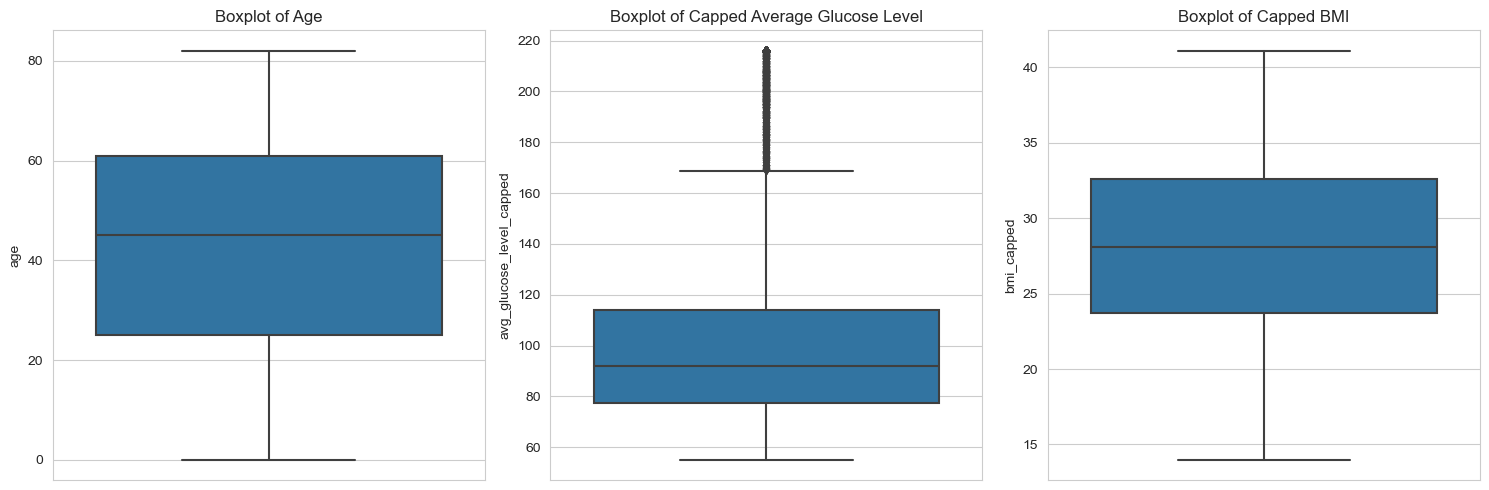

In [8]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=stroke_data['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=stroke_data['avg_glucose_level_capped'])
plt.title('Boxplot of Capped Average Glucose Level')

plt.subplot(1, 3, 3)
sns.boxplot(y=stroke_data['bmi_capped'])
plt.title('Boxplot of Capped BMI')

plt.tight_layout()
plt.show()


## 3. Statistical Analysis

### Testing for Normality

Shapiro-Wilk tests were performed to check the normality of 'age', 'avg_glucose_level_capped', and 'BMI_capped'.

In [11]:
from scipy.stats import shapiro

def test_normality_and_interpret(variable, data):
    stat, p = shapiro(data[variable])
    if p < 0.05:
        hypothesis_result = "Rejected (Data is not normally distributed)"
    else:
        hypothesis_result = "Not Rejected (Data is normally distributed)"
    return (stat, p, hypothesis_result)

normality_test_results = {
    "Age": test_normality_and_interpret('age', stroke_data),
    "Average Glucose Level (Capped)": test_normality_and_interpret('avg_glucose_level_capped', stroke_data),
    "BMI (Capped)": test_normality_and_interpret('bmi_capped', stroke_data)
}

normality_test_results


{'Age': (0.9666317105293274,
  1.761990065560187e-32,
  'Rejected (Data is not normally distributed)'),
 'Average Glucose Level (Capped)': (0.8103610277175903,
  0.0,
  'Rejected (Data is not normally distributed)'),
 'BMI (Capped)': (0.9827407002449036,
  3.420927658788032e-24,
  'Rejected (Data is not normally distributed)')}

### Chi square test

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

chi_square_results = {}
for col in ['smoking_status', 'ever_married']:
    contingency_table = pd.crosstab(stroke_data[col], stroke_data['stroke'])
    chi_square_results[col] = chi2_contingency(contingency_table)[:2]
chi_square_results

significance_level = 0.05

p_value_smoking = chi_square_results['smoking_status'][1]
if p_value_smoking < significance_level:
    print(f"Association between 'smoking_status' and 'stroke' is statistically significant with a p-value of {p_value_smoking:.15f}.")
else:
    print(f"No significant association found for 'smoking_status' and 'stroke' with a p-value of {p_value_smoking:.15f}.")

p_value_married = chi_square_results['ever_married'][1]
if p_value_married < significance_level:
    print(f"Association between 'ever_married' and 'stroke' is statistically significant with a p-value of {p_value_married:.15f}.")
else:
    print(f"No significant association found for 'ever_married' and 'stroke' with a p-value of {p_value_married:.15f}.")


Association between 'smoking_status' and 'stroke' is statistically significant with a p-value of 0.000002547567825.
Association between 'ever_married' and 'stroke' is statistically significant with a p-value of 0.000000000000034.


### Kruskal-Wallis Test

In [13]:
import pandas as pd
from scipy.stats import kruskal

numerical_cols = ['age', 'avg_glucose_level_capped', 'bmi_capped']
kruskal_results = {col: kruskal(*[group[col].values for name, group in stroke_data.groupby('stroke')]) for col in numerical_cols}
kruskal_results

significance_level = 0.05

for col, (statistic, p_value) in kruskal_results.items():
    if p_value < significance_level:
        print(f"The variable '{col}' is statistically significant with a p-value of {p_value:.15f}.")
    else:
        print(f"The variable '{col}' is not statistically significant with a p-value of {p_value:.15f}.")


The variable 'age' is statistically significant with a p-value of 0.000000000000000.
The variable 'avg_glucose_level_capped' is statistically significant with a p-value of 0.000000005293996.
The variable 'bmi_capped' is statistically significant with a p-value of 0.000011888937244.


### Correlation Matrix

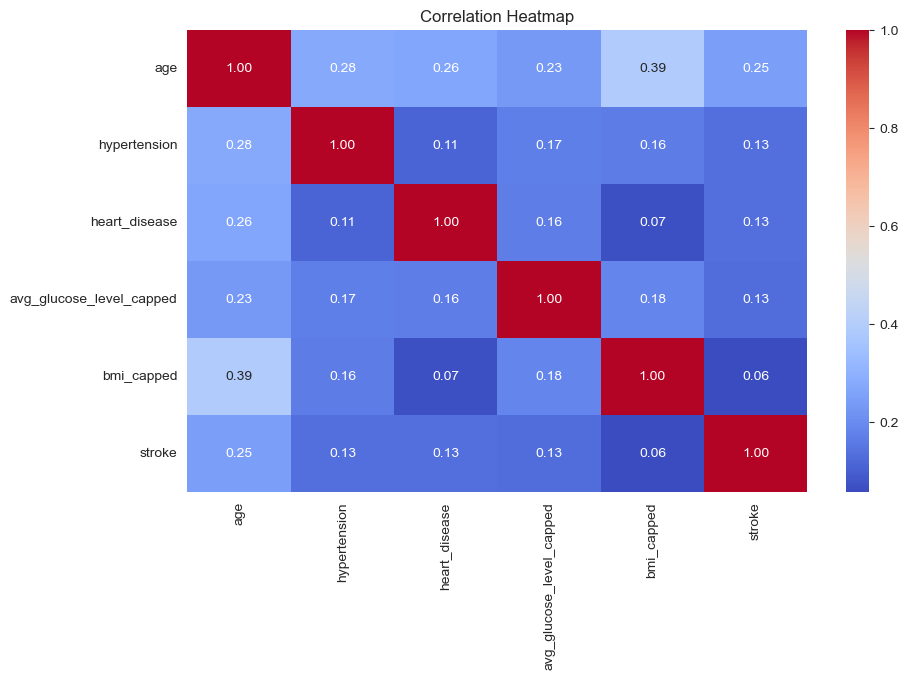

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = stroke_data[['age', 'hypertension', 'heart_disease', 
                                  'avg_glucose_level_capped', 'bmi_capped', 'stroke']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap provides insights into how different variables in the dataset are related to each other, particularly in relation to the risk of stroke. Here are some key observations:

- `Age:`

    - Shows a moderate positive correlation with stroke risk.
    - Also has a positive correlation with hypertension and heart disease.

- `Hypertension and Heart Disease:`

    -  Both show positive correlations with stroke risk, indicating that individuals with hypertension or heart disease are likely to experience a stroke.
    -  There's also a correlation between hypertension and age.
    
    
- `Capped Average Glucose Level:`

    -  Displays a positive correlation with stroke risk, though not as strong as age.
    -  There's a noticeable correlation with age, suggesting that glucose levels tend to increase with age.


- `Capped BMI:`

    - Shows a very weak correlation with stroke risk.
    - Has a positive correlation with age.


- `Interpretation:`

    - Age is a significant factor in stroke risk, as well as in the prevalence of hypertension and heart disease.
    - Both hypertension and heart disease are important risk factors for stroke.
    - Glucose levels and BMI, after capping outliers, show some correlation with stroke risk, but to a lesser extent compared to age and other health conditions.
    - This analysis can help in understanding the relationships between various health indicators and the likelihood of stroke, which is crucial for risk assessment and prevention strategies.

-`Predictive Modeling:` Investigating the potential of predicting stroke occurrence based on the variables in the dataset. This could involve logistic regression, decision trees, or other classification methods.

In [16]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 258.3/258.3 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, kruskal, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import make_pipeline

## 4. Preparing Data for Machine Learning

### One-Hot Encoding

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

stroke_data = pd.read_csv('brain_stroke.csv')

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(stroke_data[categorical_cols])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

numeric_cols = stroke_data.drop(categorical_cols + ['stroke'], axis=1)
X = pd.concat([numeric_cols, encoded_df], axis=1)
encoded_df.head()

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

### Train-Test Split

In [320]:
cap_percentile = 0.95
stroke_data['avg_glucose_level_capped'] = stroke_data['avg_glucose_level'].clip(upper=stroke_data['avg_glucose_level'].quantile(cap_percentile))
stroke_data['bmi_capped'] = stroke_data['bmi'].clip(upper=stroke_data['bmi'].quantile(cap_percentile))

X = pd.concat([stroke_data[numerical_cols], encoded_df], axis=1)
y = stroke_data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE (Synthetic Minority Over-sampling Technique)

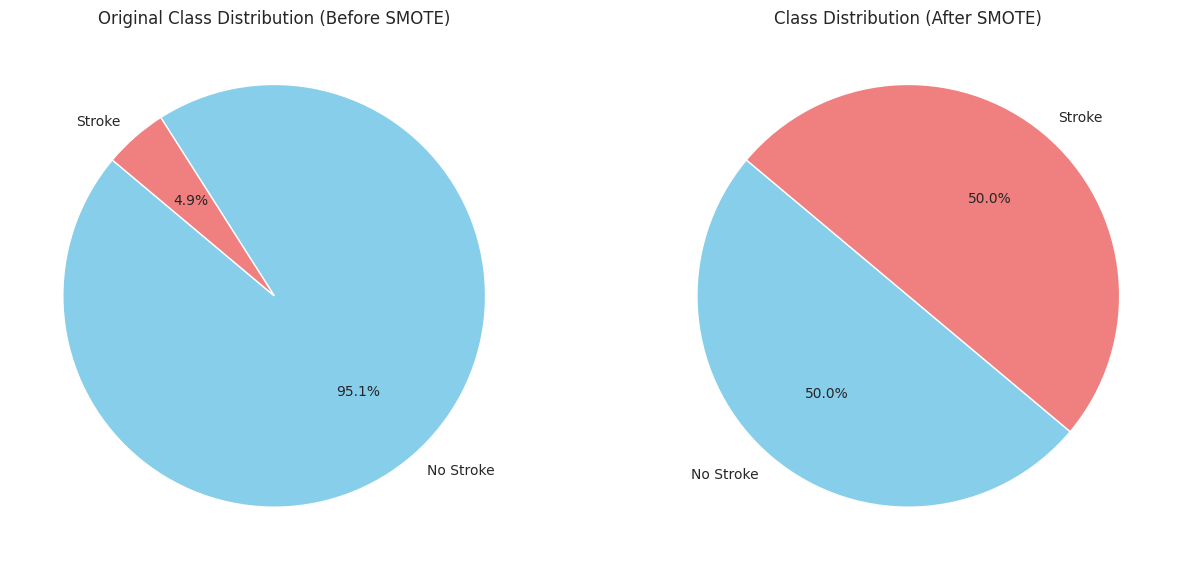

In [321]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

original_balance = y_train.value_counts()

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

balance_check = pd.Series(y_train_smote).value_counts()

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.pie(original_balance, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Original Class Distribution (Before SMOTE)')

plt.subplot(1, 2, 2)
plt.pie(balance_check, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution (After SMOTE)')

plt.show()

## 5. Model Building

### Logistic Regression

#### Training the Model

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Model Scoring

In [323]:
train_score_log_reg = log_reg.score(X_train, y_train)
test_score_log_reg = log_reg.score(X_test, y_test)
print("Logistic Regression - Training Score:", train_score_log_reg)
print("Logistic Regression - Testing Score:", test_score_log_reg)

Logistic Regression - Training Score: 0.9513052208835341
Logistic Regression - Testing Score: 0.9458375125376128


#### Predictions

In [324]:
y_pred_log_reg = log_reg.predict(X_test)

#### Classification Report

In [325]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, zero_division=0))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



#### Confusion Matrix and Visualization

Confusion Matrix:
[[943   0]
 [ 54   0]]


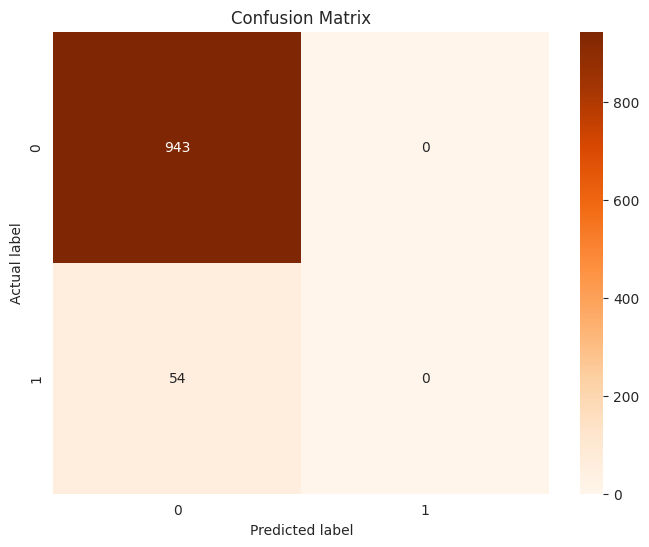

In [326]:
cm = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Sensitivity and Specificity Calculation

In [327]:
TP = cm[1, 1] 
TN = cm[0, 0] 
FP = cm[0, 1] 
FN = cm[1, 0] 

sensitivity = TP / float(TP + FN)
specificity = TN / float(TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.0
Specificity: 1.0


#### Model Performance Metrics

In [328]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg, zero_division=0)
recall = recall_score(y_test, y_pred_log_reg, zero_division=0)
f1 = f1_score(y_test, y_pred_log_reg, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall/Sensitivity:", recall)
print("F1 Score:", f1)

Accuracy: 0.9458375125376128
Precision: 0.0
Recall/Sensitivity: 0.0
F1 Score: 0.0


#### ROC Curve and AUC

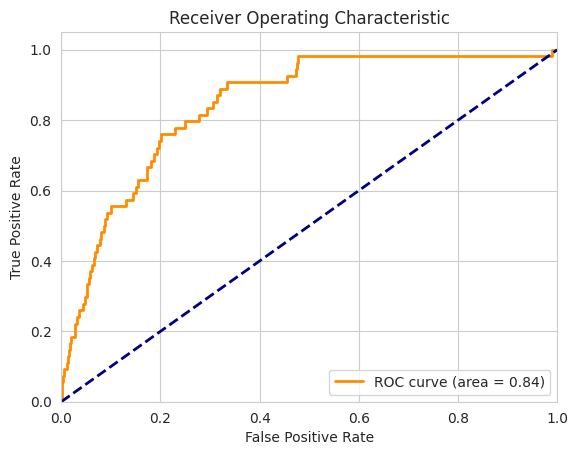

In [329]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

#### Training the Model

In [330]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Model Scoring

In [331]:
train_score_dt = decision_tree.score(X_train, y_train)
test_score_dt = decision_tree.score(X_test, y_test)
print("Decision Tree - Training Score:", train_score_dt)
print("Decision Tree - Testing Score:", test_score_dt)


Decision Tree - Training Score: 1.0
Decision Tree - Testing Score: 0.9117352056168505


#### Making Predictions

In [332]:
y_pred_dt = decision_tree.predict(X_test)

#### Confusion Matrix and Visualization

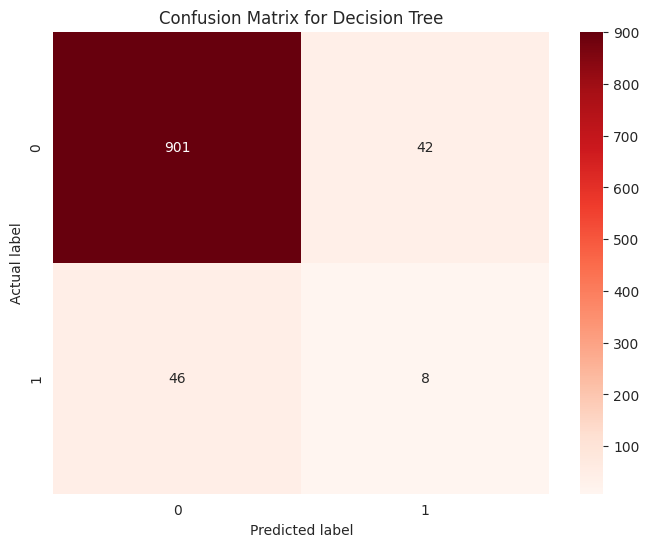

In [333]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Classification Report

In [334]:
from sklearn.metrics import classification_report

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       943
           1       0.16      0.15      0.15        54

    accuracy                           0.91       997
   macro avg       0.56      0.55      0.55       997
weighted avg       0.91      0.91      0.91       997



#### Model Performance Metrics

In [335]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)


Accuracy: 0.9117352056168505
Precision: 0.9085599777156178
Recall: 0.9117352056168505
F1 Score: 0.9101312076236849


#### ROC Curve and AUC

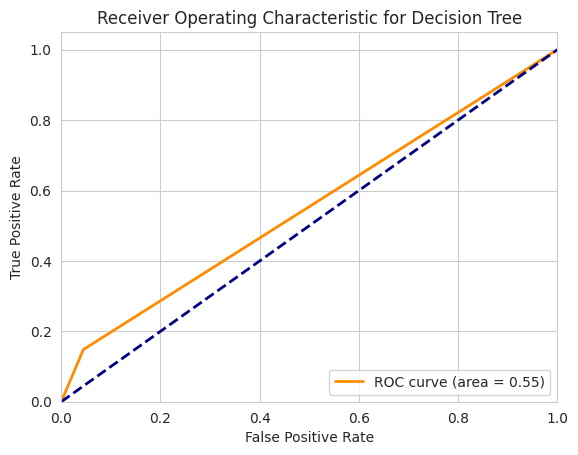

In [336]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob_dt = decision_tree.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

### Random Forest

#### Initial Model Training

In [337]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Initial Model Scoring

In [338]:
train_score_initial = clf.score(X_train, y_train)
test_score_initial = clf.score(X_test, y_test)
print("Initial Model - Training Score:", train_score_initial)
print("Initial Model - Testing Score:", test_score_initial)

Initial Model - Training Score: 1.0
Initial Model - Testing Score: 0.9438314944834504


#### Initial Predictions

In [339]:
y_pred_initial = clf.predict(X_test)

#### Initial Model Evaluation

Classification Report (Initial Model):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



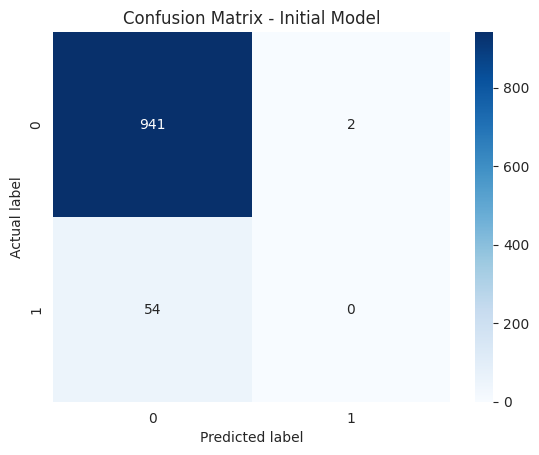

In [340]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report (Initial Model):")
print(classification_report(y_test, y_pred_initial))

cm_initial = confusion_matrix(y_test, y_pred_initial)
sns.heatmap(cm_initial, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Initial Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


#### Hyperparameter Tuning with Randomized Search

In [341]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

clf_random = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
clf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

#### Best Parameters and Retrained Model

In [342]:
best_params = clf_random.best_params_
print("Best Parameters:", best_params)

clf_best = RandomForestClassifier(**best_params, random_state=42)
clf_best.fit(X_train, y_train)


Best Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini'}


RandomForestClassifier(max_depth=4, random_state=42)

#### Retrained Model Scoring

In [343]:
train_score_best = clf_best.score(X_train, y_train)
test_score_best = clf_best.score(X_test, y_test)
print("Best Model - Training Score:", train_score_best)
print("Best Model - Testing Score:", test_score_best)

Best Model - Training Score: 0.9513052208835341
Best Model - Testing Score: 0.9458375125376128


#### Feature Importance Analysis

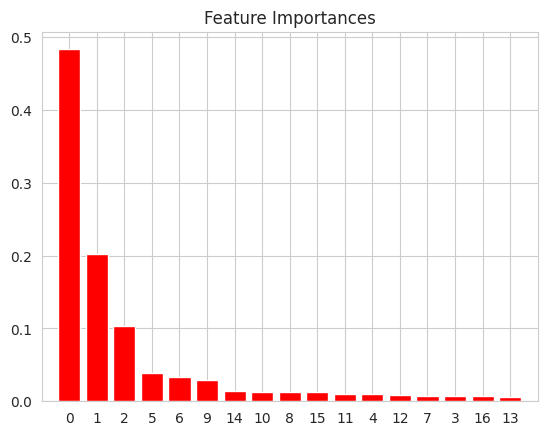

In [344]:
import matplotlib.pyplot as plt

importances = clf_best.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


#### Predictions with Retrained Model

In [345]:
y_pred_best = clf_best.predict(X_test)


#### Final Model Evaluation(Classification Report and Confusion Matrix)

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



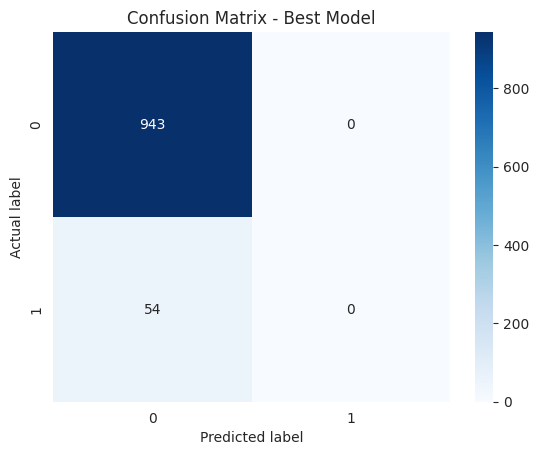

In [346]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best, zero_division=0))

cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Best Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


#### ROC Curve

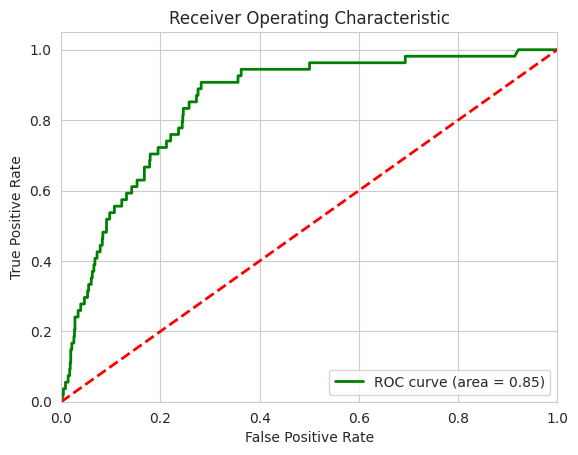

In [347]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = clf_best.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### XGBoost

#### Importing Libraries and Splitting the Dataset

In [348]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Training

In [349]:
xgb_clf = xgb.XGBClassifier(eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

#### Hyperparameter Tuning

In [350]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'subsample': [0.5, 0.75, 1.0]
}

xgb_random = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.75, 1.0]},
                   random_state=42, verbose=2)

#### Retraining the Model With Best Parameters

In [351]:
best_params = xgb_random.best_params_
xgb_clf_best = xgb.XGBClassifier(**best_params, eval_metric='logloss')
xgb_clf_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

#### Predictions and Model Evaluation

Accuracy: 0.9448345035105316

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



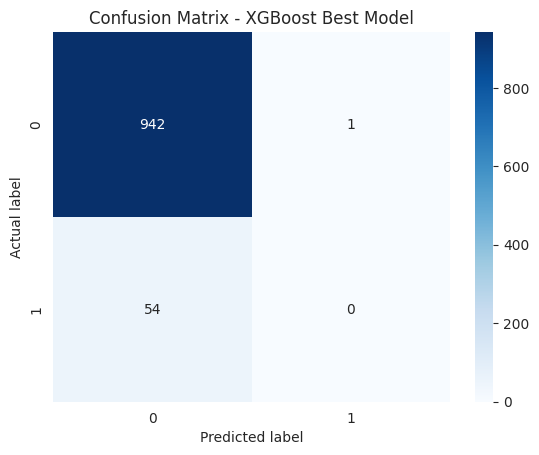

In [352]:
y_pred_xgb_best = xgb_clf_best.predict(X_test)
y_pred_prob_xgb_best = xgb_clf_best.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_xgb_best)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_best))

cm = confusion_matrix(y_test, y_pred_xgb_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - XGBoost Best Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


#### ROC Curve Plotting

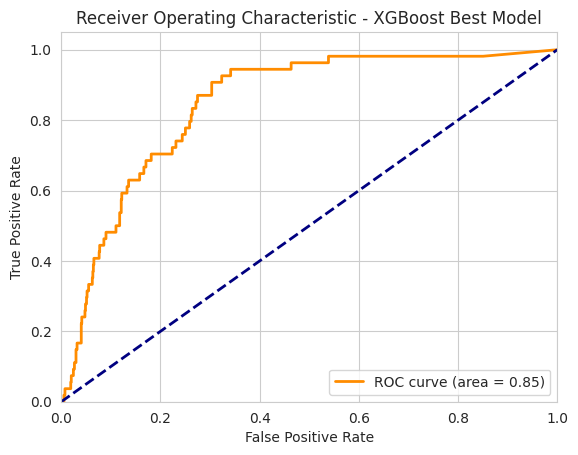

In [353]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb_best)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost Best Model')
plt.legend(loc="lower right")
plt.show()


#### Feature Importance Analysis

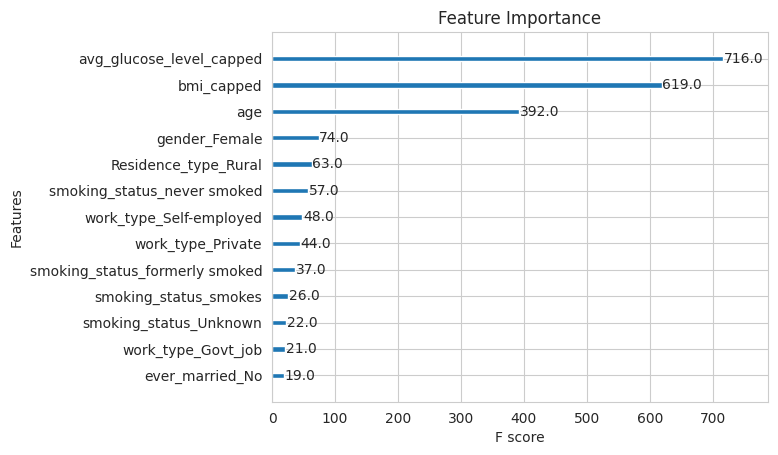

In [354]:
xgb.plot_importance(xgb_clf)
plt.title('Feature Importance')
plt.show()

## ROC Curve Analysis Across Four Models

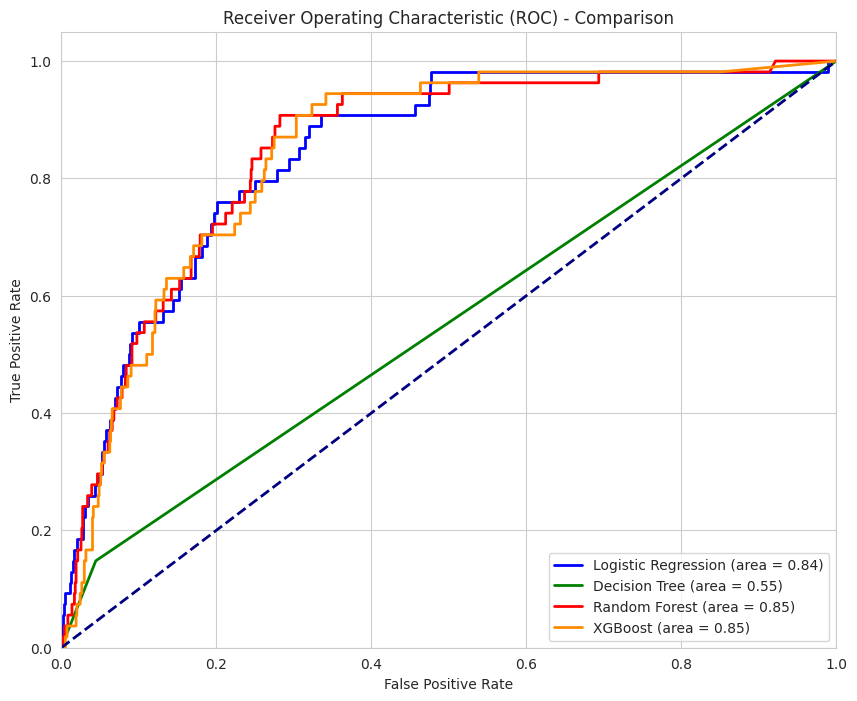

In [356]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

y_pred_prob_dt = decision_tree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_pred_prob_rf = clf_best.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

y_pred_prob_xgb = xgb_clf_best.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison')
plt.legend(loc="lower right")
plt.show()